In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# --- 1. Load the dataset ---
df = pd.read_csv(r'C:\Users\kssus\Downloads\train.csv')

print("--- Initial Dataset Information ---")
df.info()

print("\n--- Descriptive Statistics ---")
print(df.describe())

print("\n--- Value Counts for Key Categorical Columns ---")
print("\nValue Counts for 'Survived':")
print(df['Survived'].value_counts())

print("\nValue Counts for 'Pclass':")
print(df['Pclass'].value_counts())

print("\nValue Counts for 'Sex':")
print(df['Sex'].value_counts())

print("\nValue Counts for 'Embarked':")
print(df['Embarked'].value_counts())

print("\n--- Missing Values Before Imputation ---")
print(df.isnull().sum())

--- Initial Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

--- Descriptive Statistics ---
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.

In [26]:
# --- 2. Handle Missing Values ---
# Impute missing 'Age' values with the median of the 'Age' column.
# Using median is robust to outliers compared to mean.
df['Age'] = df['Age'].fillna(df['Age'].median())

# Impute missing 'Embarked' values with the mode (most frequent value).
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop 'Cabin' column due to a very high number of missing values (over 70%)
df.drop('Cabin', axis=1, inplace=True)

print("\n--- Missing Values After Imputation and Dropping 'Cabin' ---")
print(df.isnull().sum())


--- Missing Values After Imputation and Dropping 'Cabin' ---
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


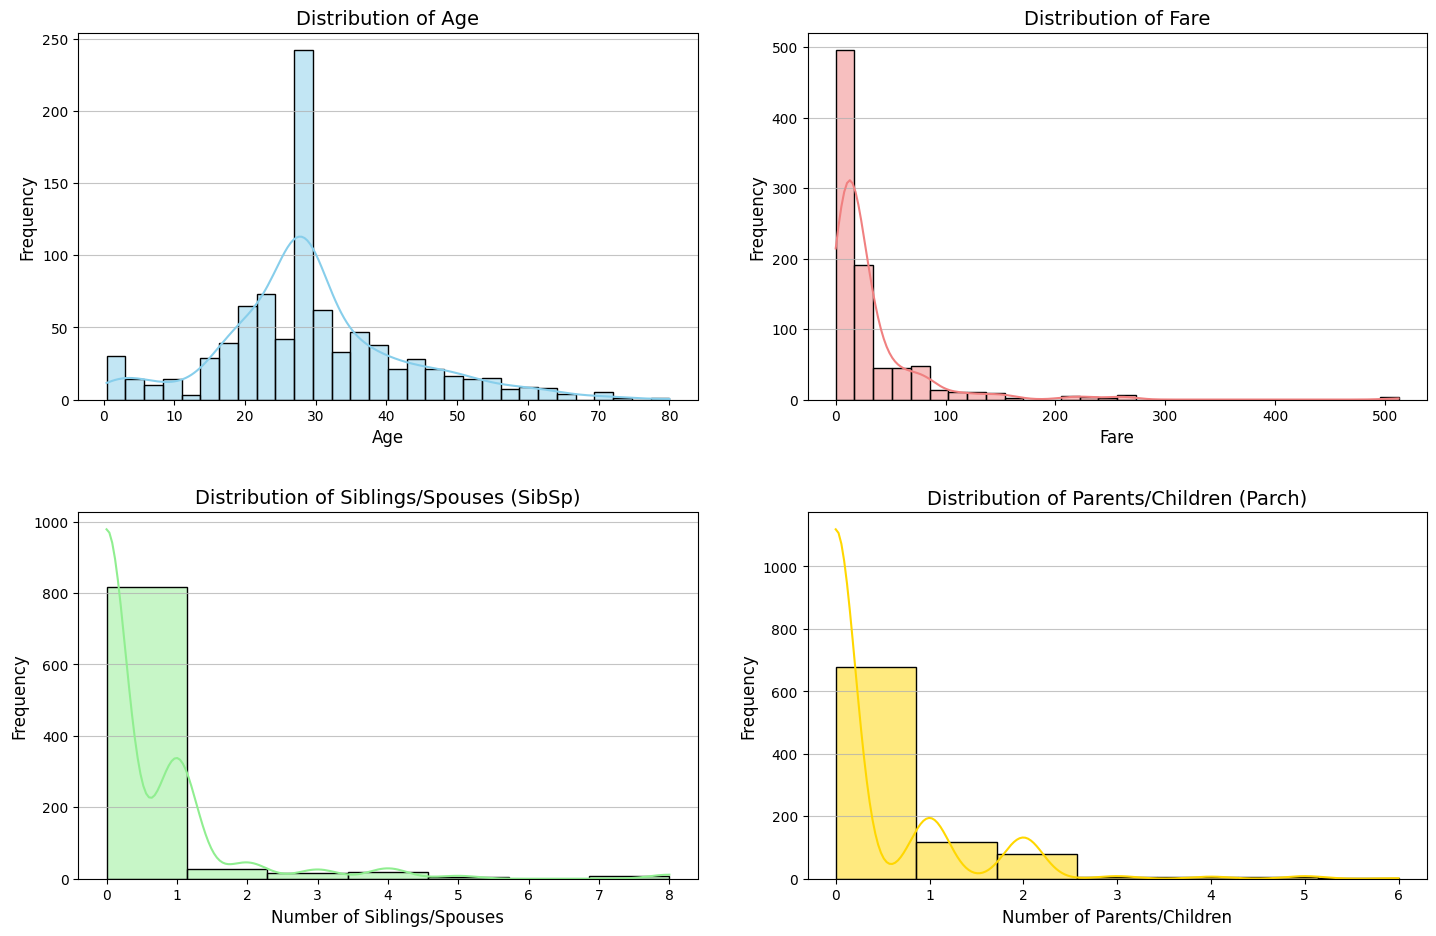


Distribution of Age:
Observation: The age distribution, after median imputation for missing values, appears to be slightly right-skewed, with a prominent peak around 20-30 years. This indicates that the majority of passengers were young adults. There's also a noticeable number of very young passengers (children) and a decreasing frequency as age increases beyond 30.

Distribution of Fare:
Observation: The fare distribution is highly right-skewed, with a large concentration of passengers paying low fares (below $50). A few passengers paid significantly higher fares, suggesting a wide range of economic backgrounds and the presence of luxury cabins. This skewness is common in real-world pricing data.

Distribution of SibSp (Siblings/Spouses Aboard):
Observation: The vast majority of passengers (~600) traveled without siblings or spouses (SibSp = 0). A smaller proportion had 1 sibling/spouse, and very few had 2 or more. This suggests that many passengers were traveling alone or with a sin

In [40]:
# --- 3. Visual Exploration (Histograms) ---
plt.figure(figsize=(15, 10))

# Histogram for Age distribution
plt.subplot(2, 2, 1) # (rows, columns, plot_number)
sns.histplot(df['Age'], kde=True, bins=30, color='skyblue') 
plt.title('Distribution of Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)

# Histogram for Fare distribution
plt.subplot(2, 2, 2)
sns.histplot(df['Fare'], kde=True, bins=30, color='lightcoral')
plt.title('Distribution of Fare', fontsize=14)
plt.xlabel('Fare', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)

# Histogram for SibSp distribution
plt.subplot(2, 2, 3)
sns.histplot(df['SibSp'], kde=True, bins=df['SibSp'].nunique(), color='lightgreen') # Bins for discrete counts
plt.title('Distribution of Siblings/Spouses (SibSp)', fontsize=14)
plt.xlabel('Number of Siblings/Spouses', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)

# Histogram for Parch distribution
plt.subplot(2, 2, 4)
sns.histplot(df['Parch'], kde=True, bins=df['Parch'].nunique(), color='gold') # Bins for discrete counts
plt.title('Distribution of Parents/Children (Parch)', fontsize=14)
plt.xlabel('Number of Parents/Children', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)

plt.tight_layout(pad=3.0) 
plt.show()

print('''
Distribution of Age:
Observation: The age distribution, after median imputation for missing values, appears to be slightly right-skewed, with a prominent peak around 20-30 years. This indicates that the majority of passengers were young adults. There's also a noticeable number of very young passengers (children) and a decreasing frequency as age increases beyond 30.

Distribution of Fare:
Observation: The fare distribution is highly right-skewed, with a large concentration of passengers paying low fares (below $50). A few passengers paid significantly higher fares, suggesting a wide range of economic backgrounds and the presence of luxury cabins. This skewness is common in real-world pricing data.

Distribution of SibSp (Siblings/Spouses Aboard):
Observation: The vast majority of passengers (~600) traveled without siblings or spouses (SibSp = 0). A smaller proportion had 1 sibling/spouse, and very few had 2 or more. This suggests that many passengers were traveling alone or with a single family member.

Distribution of Parch (Parents/Children Aboard):
Observation: Similar to SibSp, most passengers (~700) traveled without parents or children (Parch = 0). Very few had 1 or 2 parents/children, and even fewer had larger families on board. This further reinforces the idea that many passengers were traveling independently or with very small immediate families.
''')

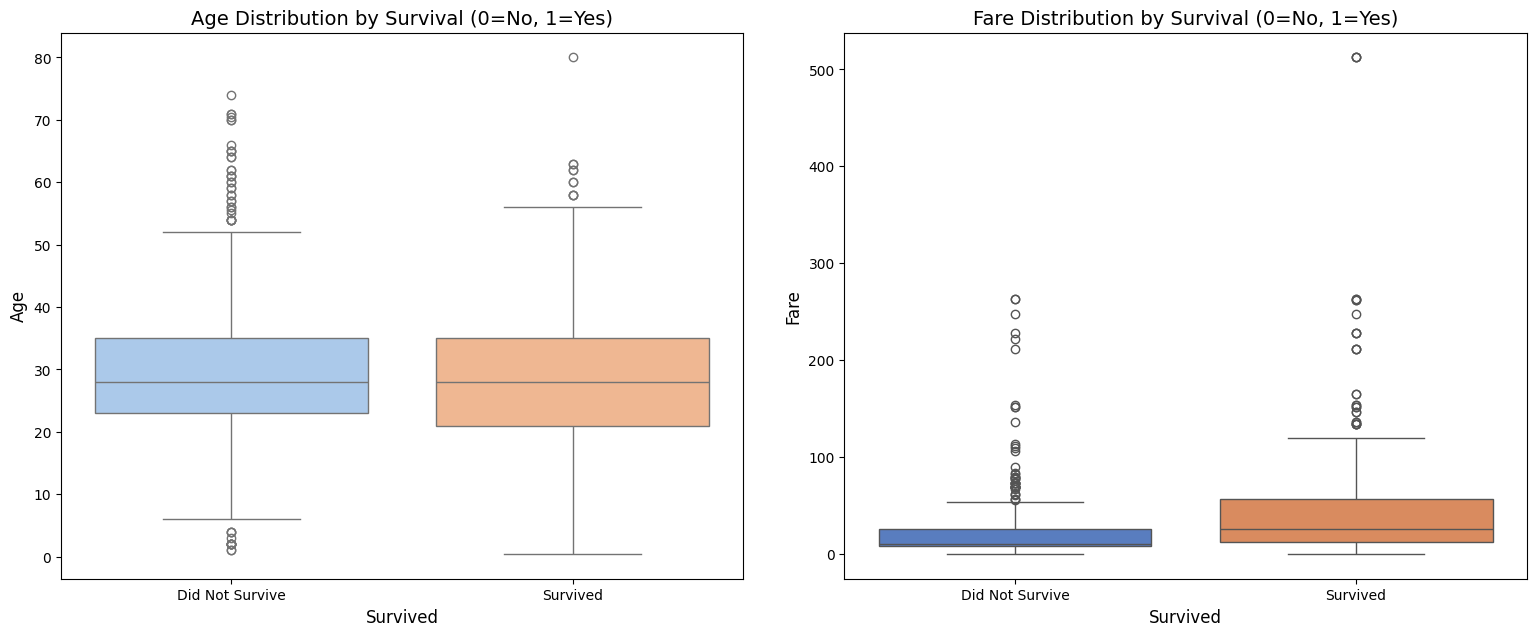


Age Distribution by Survival:

Observation: The median age for those who did not survive (0) is slightly higher than for those who survived (1), although the difference is not very large. The interquartile range (IQR) for non-survivors appears slightly wider, suggesting a more varied age group among those who perished. Notably, there are some outliers in both groups, especially older individuals who did not survive.

Fare Distribution by Survival:

Observation: Passengers who survived (1) generally paid significantly higher fares compared to those who did not survive (0). The median fare for survivors is substantially greater, and the distribution for survivors is much wider, indicating that high-fare passengers (likely from higher classes) had a better chance of survival. This plot shows a strong relationship between fare and survival.



In [41]:
# --- 4. Visual Exploration (Boxplots for Numerical Features by Survival) ---

plt.figure(figsize=(16, 7))

# Boxplot for Age vs. Survived
plt.subplot(1, 2, 1)
# Updated: Assign 'Survived' to hue and set legend=False to resolve FutureWarning
sns.boxplot(x='Survived', y='Age', data=df, hue='Survived', palette='pastel', legend=False)
plt.title('Age Distribution by Survival (0=No, 1=Yes)', fontsize=14)
plt.xlabel('Survived', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks([0, 1], ['Did Not Survive', 'Survived']) # Custom x-axis labels

# Boxplot for Fare vs. Survived
plt.subplot(1, 2, 2)
# Updated: Assign 'Survived' to hue and set legend=False to resolve FutureWarning
sns.boxplot(x='Survived', y='Fare', data=df, hue='Survived', palette='muted', legend=False)
plt.title('Fare Distribution by Survival (0=No, 1=Yes)', fontsize=14)
plt.xlabel('Survived', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.xticks([0, 1], ['Did Not Survive', 'Survived']) # Custom x-axis labels

plt.tight_layout(pad=3.0)
plt.show()

print('''
Age Distribution by Survival:

Observation: The median age for those who did not survive (0) is slightly higher than for those who survived (1), although the difference is not very large. The interquartile range (IQR) for non-survivors appears slightly wider, suggesting a more varied age group among those who perished. Notably, there are some outliers in both groups, especially older individuals who did not survive.

Fare Distribution by Survival:

Observation: Passengers who survived (1) generally paid significantly higher fares compared to those who did not survive (0). The median fare for survivors is substantially greater, and the distribution for survivors is much wider, indicating that high-fare passengers (likely from higher classes) had a better chance of survival. This plot shows a strong relationship between fare and survival.
''')

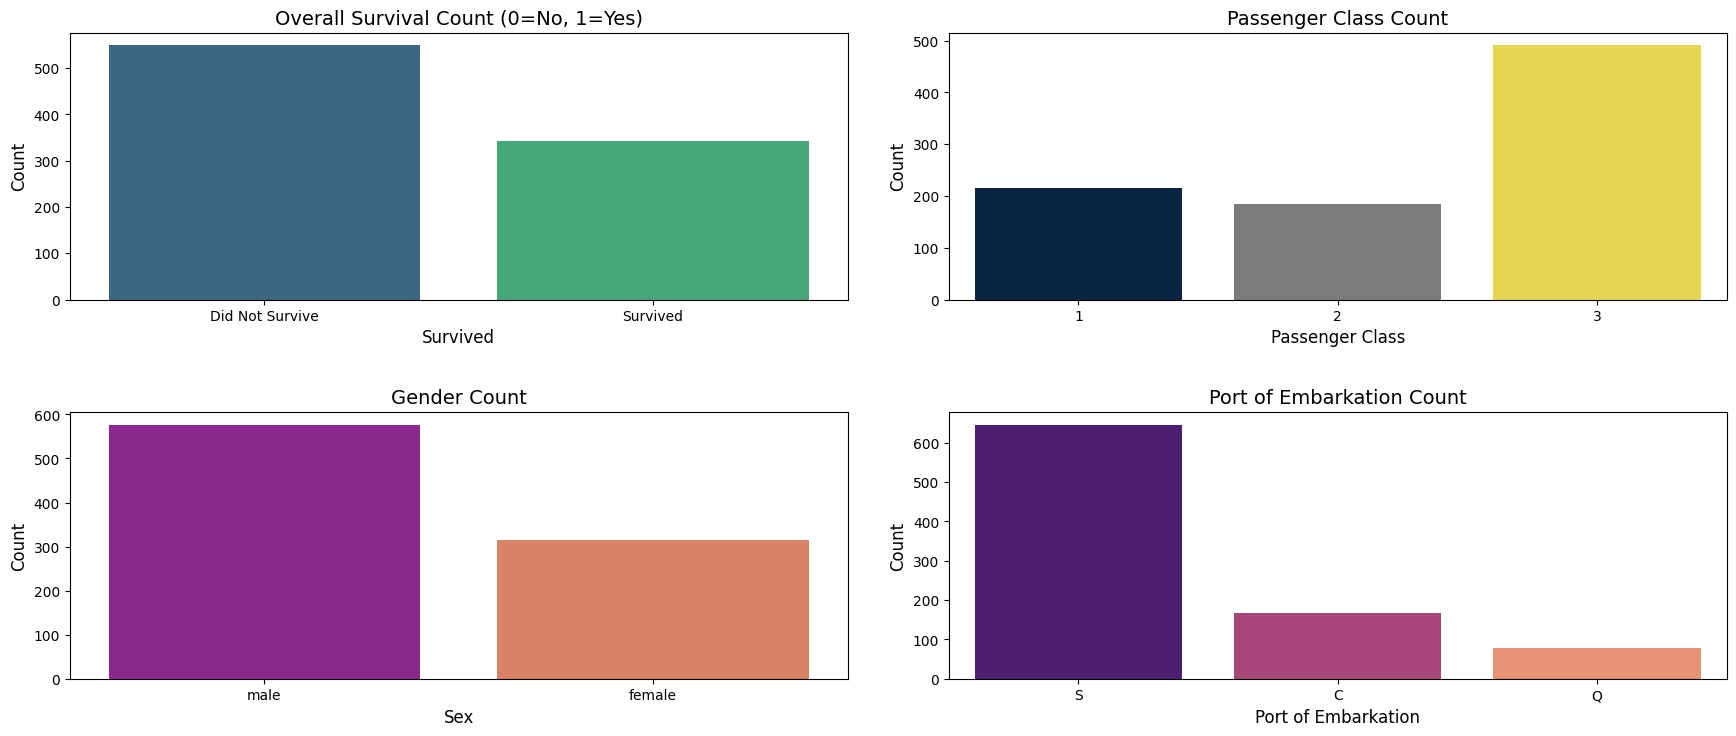


Overall Survival Count (0=No, 1=Yes):

Observation: There were more passengers who did not survive (549) than those who survived (342). This visually confirms the initial statistic that the overall survival rate was less than 50%.

Passenger Class Count:

Observation: The 3rd class had the highest number of passengers (491), followed by 1st class (216) and 2nd class (184). This reflects the class demographics on the Titanic, with the largest proportion of passengers in the most affordable class.

Gender Count:

Observation: There were significantly more male passengers (577) than female passengers (314) on board.

Port of Embarkation Count:

Observation: Southampton ('S') was the most common port of embarkation, with a large majority of passengers boarding there. Cherbourg ('C') was the second most common, followed by Queenstown ('Q').



In [42]:
# --- 5. Visual Exploration (Countplots for Categorical Features) ---

plt.figure(figsize=(18, 8))

# Countplot for Survival
plt.subplot(2, 2, 1)
# Updated: Assign 'Survived' to hue and set legend=False to resolve FutureWarning
sns.countplot(x='Survived', data=df, hue='Survived', palette='viridis', legend=False)
plt.title('Overall Survival Count (0=No, 1=Yes)', fontsize=14)
plt.xlabel('Survived', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])

# Countplot for Pclass
plt.subplot(2, 2, 2)
# Updated: Assign 'Pclass' to hue and set legend=False to resolve FutureWarning
sns.countplot(x='Pclass', data=df, hue='Pclass', palette='cividis', legend=False)
plt.title('Passenger Class Count', fontsize=14)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Countplot for Sex
plt.subplot(2, 2, 3)
# Updated: Assign 'Sex' to hue and set legend=False to resolve FutureWarning
sns.countplot(x='Sex', data=df, hue='Sex', palette='plasma', legend=False)
plt.title('Gender Count', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Countplot for Embarked
plt.subplot(2, 2, 4)
# Updated: Assign 'Embarked' to hue and set legend=False to resolve FutureWarning
sns.countplot(x='Embarked', data=df, hue='Embarked', palette='magma', legend=False)
plt.title('Port of Embarkation Count', fontsize=14)
plt.xlabel('Port of Embarkation', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout(pad=3.0)
plt.show()

print('''
Overall Survival Count (0=No, 1=Yes):

Observation: There were more passengers who did not survive (549) than those who survived (342). This visually confirms the initial statistic that the overall survival rate was less than 50%.

Passenger Class Count:

Observation: The 3rd class had the highest number of passengers (491), followed by 1st class (216) and 2nd class (184). This reflects the class demographics on the Titanic, with the largest proportion of passengers in the most affordable class.

Gender Count:

Observation: There were significantly more male passengers (577) than female passengers (314) on board.

Port of Embarkation Count:

Observation: Southampton ('S') was the most common port of embarkation, with a large majority of passengers boarding there. Cherbourg ('C') was the second most common, followed by Queenstown ('Q').
''')

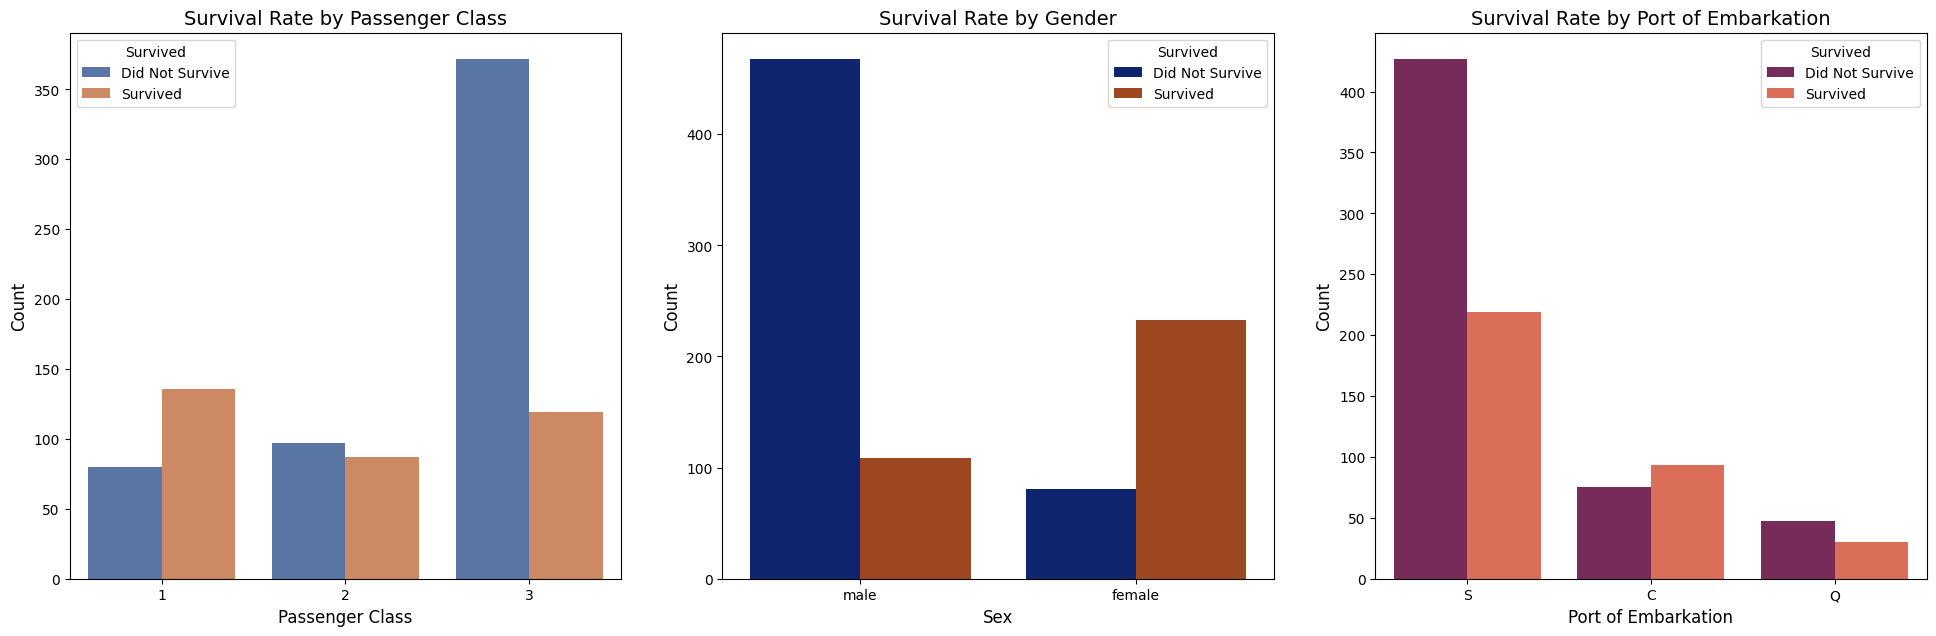


Survival Rate by Passenger Class:

Observation: A stark difference in survival rates is evident across passenger classes. 1st class passengers had the highest survival rate, followed by 2nd class. 3rd class passengers had the lowest survival rate, with the majority of non-survivors coming from this class. This suggests that class was a major determinant of survival.

Survival Rate by Gender:

Observation: Female passengers had a significantly higher survival rate than male passengers. This is one of the most prominent observations, strongly supporting the "women and children first" evacuation protocol.

Survival Rate by Port of Embarkation:

Observation: Passengers who embarked from Cherbourg ('C') appear to have a higher survival rate relative to their numbers compared to those from Southampton ('S') and Queenstown ('Q'). This might be correlated with the class composition of passengers from each port.



In [43]:
# --- 6. Visual Exploration (Countplots for Categorical Features vs. Survived) ---
plt.figure(figsize=(20, 7))

# Survival by Passenger Class
plt.subplot(1, 3, 1)
sns.countplot(x='Pclass', hue='Survived', data=df, palette='deep')
plt.title('Survival Rate by Passenger Class', fontsize=14)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])

# Survival by Sex
plt.subplot(1, 3, 2)
sns.countplot(x='Sex', hue='Survived', data=df, palette='dark')
plt.title('Survival Rate by Gender', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])

# Survival by Port of Embarkation
plt.subplot(1, 3, 3)
sns.countplot(x='Embarked', hue='Survived', data=df, palette='rocket')
plt.title('Survival Rate by Port of Embarkation', fontsize=14)
plt.xlabel('Port of Embarkation', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])

plt.tight_layout(pad=3.0)
plt.show()

print('''
Survival Rate by Passenger Class:

Observation: A stark difference in survival rates is evident across passenger classes. 1st class passengers had the highest survival rate, followed by 2nd class. 3rd class passengers had the lowest survival rate, with the majority of non-survivors coming from this class. This suggests that class was a major determinant of survival.

Survival Rate by Gender:

Observation: Female passengers had a significantly higher survival rate than male passengers. This is one of the most prominent observations, strongly supporting the "women and children first" evacuation protocol.

Survival Rate by Port of Embarkation:

Observation: Passengers who embarked from Cherbourg ('C') appear to have a higher survival rate relative to their numbers compared to those from Southampton ('S') and Queenstown ('Q'). This might be correlated with the class composition of passengers from each port.
''')

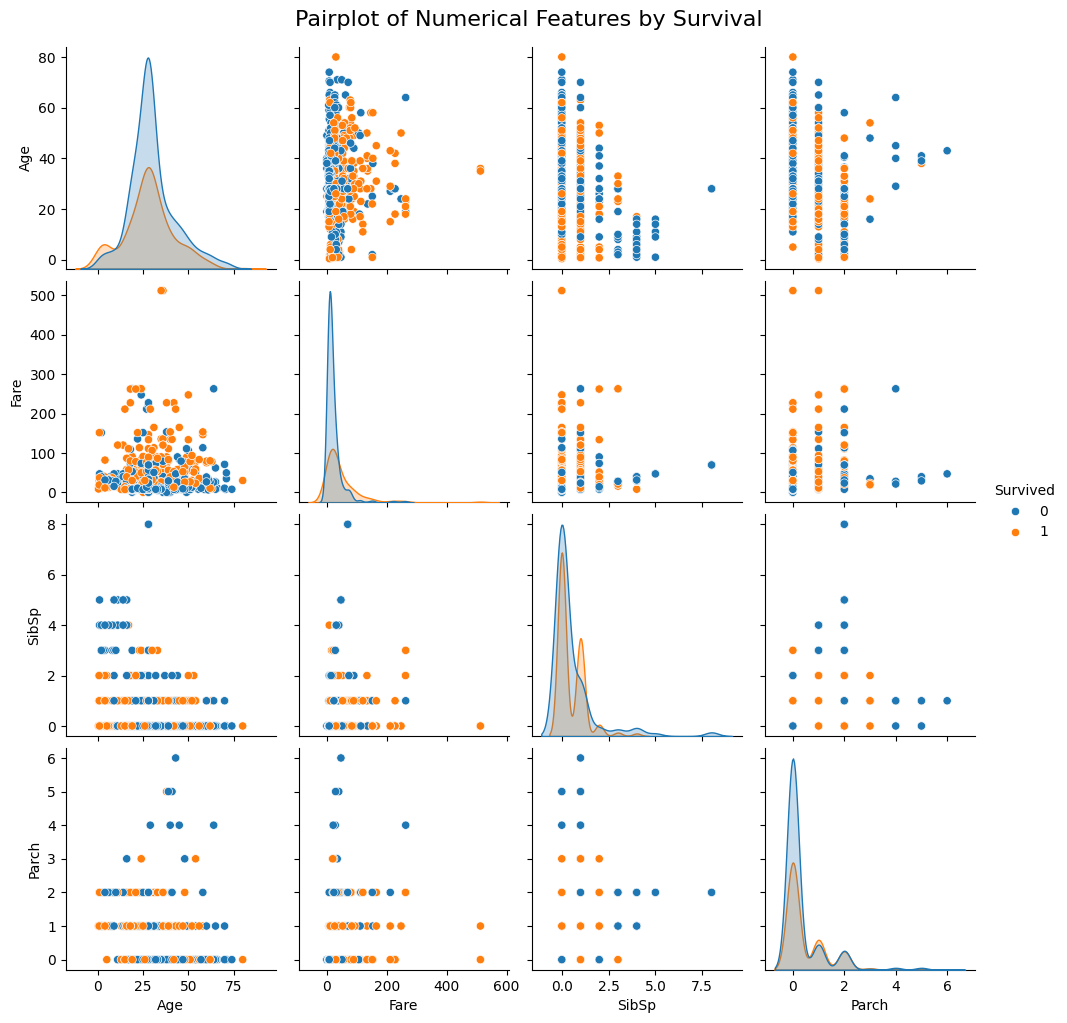


Pairplot of Numerical Features by Survival
Observation: The pairplot provides a holistic view of relationships between numerical features, colored by survival status.

Age vs. Fare: Survivors (orange) tend to cluster in the higher fare ranges, regardless of age, and there's a denser cluster of non-survivors (blue) at lower fares.

Age vs. SibSp/Parch: For lower SibSp and Parch values (i.e., smaller families or individuals), survival is more mixed. However, for larger family sizes (higher SibSp or Parch), the blue points (non-survivors) dominate, suggesting that traveling in large groups was a disadvantage for survival.

The diagonal plots show the individual distributions, reaffirming observations from the histograms, with colors indicating survival groups.



In [44]:
# --- 7. Visual Exploration (Pairplot) ---
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch', 'Survived']
sns.pairplot(df[numerical_features], hue='Survived', diag_kind='kde', palette='tab10')
plt.suptitle('Pairplot of Numerical Features by Survival', y=1.02, fontsize=16)
plt.show()

print('''
Pairplot of Numerical Features by Survival
Observation: The pairplot provides a holistic view of relationships between numerical features, colored by survival status.

Age vs. Fare: Survivors (orange) tend to cluster in the higher fare ranges, regardless of age, and there's a denser cluster of non-survivors (blue) at lower fares.

Age vs. SibSp/Parch: For lower SibSp and Parch values (i.e., smaller families or individuals), survival is more mixed. However, for larger family sizes (higher SibSp or Parch), the blue points (non-survivors) dominate, suggesting that traveling in large groups was a disadvantage for survival.

The diagonal plots show the individual distributions, reaffirming observations from the histograms, with colors indicating survival groups.
''')


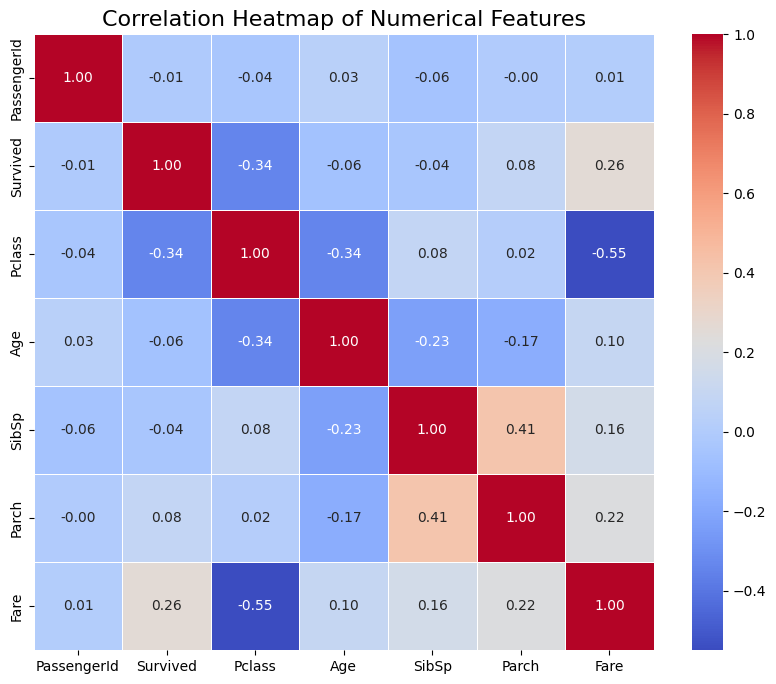


Correlation Heatmap of Numerical Features
Observation:

Survived shows a moderate positive correlation with Fare (approx. 0.26), indicating that higher fares (and likely higher class) are associated with higher survival rates.

Survived shows a moderate negative correlation with Pclass (approx. -0.34), meaning that a lower Pclass value (i.e., 1st class) is positively correlated with survival.

SibSp and Parch are positively correlated (approx. 0.41), which is expected as they both represent family members.

Age has a very weak negative correlation with Survived (approx. -0.06), suggesting that age alone (after median imputation) is not a strong linear predictor of survival.



In [45]:
# --- 8. Visual Exploration (Correlation Heatmap) ---

plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

print('''
Correlation Heatmap of Numerical Features
Observation:

Survived shows a moderate positive correlation with Fare (approx. 0.26), indicating that higher fares (and likely higher class) are associated with higher survival rates.

Survived shows a moderate negative correlation with Pclass (approx. -0.34), meaning that a lower Pclass value (i.e., 1st class) is positively correlated with survival.

SibSp and Parch are positively correlated (approx. 0.41), which is expected as they both represent family members.

Age has a very weak negative correlation with Survived (approx. -0.06), suggesting that age alone (after median imputation) is not a strong linear predictor of survival.
''')

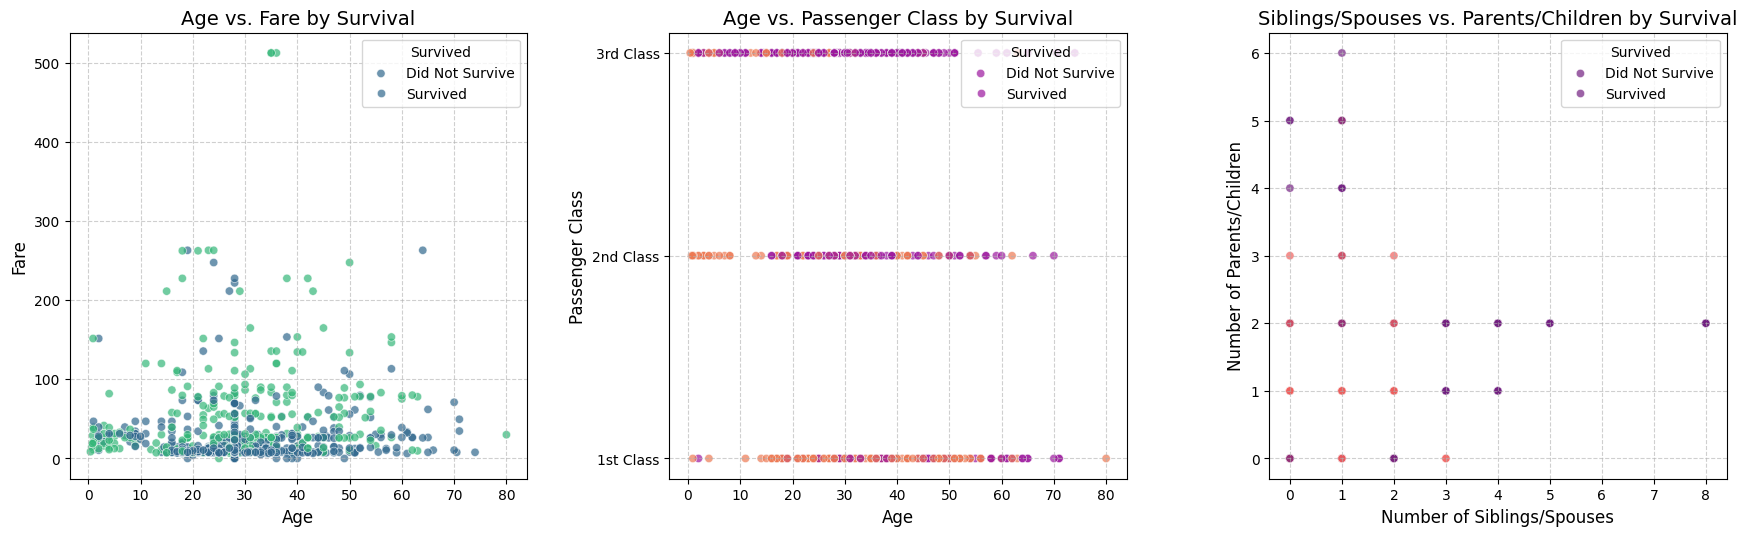


Age vs. Fare by Survival:

Observation: There's a clear visual separation by fare: passengers who paid higher fares are predominantly survivors, regardless of age. Non-survivors are heavily concentrated at lower fare values. This reiterates the strong influence of fare/class on survival.

Age vs. Passenger Class by Survival:

Observation: This plot distinctly shows the distribution of ages within each passenger class. 1st class has a wide age range of survivors, while 3rd class has a denser cluster of non-survivors across various ages. Very young children (under ~5-10) in 3rd class show some survival, but the overall trend for 3rd class is high non-survival.

Siblings/Spouses vs. Parents/Children by Survival:

Observation: Passengers with no siblings/spouses and no parents/children (SibSp=0, Parch=0) form the largest cluster, and survival within this group is mixed. As SibSp or Parch increases (larger family sizes), the concentration of non-survivors (blue points) tends to become more

In [46]:
# --- 9. Visual Exploration (Scatterplots) ---
plt.figure(figsize=(18, 6))

# Scatterplot of Age vs. Fare, colored by Survived
plt.subplot(1, 3, 1)
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, palette='viridis', alpha=0.7)
plt.title('Age vs. Fare by Survival', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])
plt.grid(True, linestyle='--', alpha=0.6)

# Scatterplot of Age vs. Pclass, colored by Survived
plt.subplot(1, 3, 2)
sns.scatterplot(x='Age', y='Pclass', hue='Survived', data=df, palette='plasma', alpha=0.7)
plt.title('Age vs. Passenger Class by Survival', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Passenger Class', fontsize=12)
plt.yticks([1, 2, 3], ['1st Class', '2nd Class', '3rd Class'])
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])
plt.grid(True, linestyle='--', alpha=0.6)

# Scatterplot of SibSp vs. Parch, colored by Survived
plt.subplot(1, 3, 3)
sns.scatterplot(x='SibSp', y='Parch', hue='Survived', data=df, palette='magma', alpha=0.7)
plt.title('Siblings/Spouses vs. Parents/Children by Survival', fontsize=14)
plt.xlabel('Number of Siblings/Spouses', fontsize=12)
plt.ylabel('Number of Parents/Children', fontsize=12)
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(pad=3.0)
plt.show()

print('''
Age vs. Fare by Survival:

Observation: There's a clear visual separation by fare: passengers who paid higher fares are predominantly survivors, regardless of age. Non-survivors are heavily concentrated at lower fare values. This reiterates the strong influence of fare/class on survival.

Age vs. Passenger Class by Survival:

Observation: This plot distinctly shows the distribution of ages within each passenger class. 1st class has a wide age range of survivors, while 3rd class has a denser cluster of non-survivors across various ages. Very young children (under ~5-10) in 3rd class show some survival, but the overall trend for 3rd class is high non-survival.

Siblings/Spouses vs. Parents/Children by Survival:

Observation: Passengers with no siblings/spouses and no parents/children (SibSp=0, Parch=0) form the largest cluster, and survival within this group is mixed. As SibSp or Parch increases (larger family sizes), the concentration of non-survivors (blue points) tends to become more dominant, particularly for families with 3 or more members in either category. This suggests that the presence of too many dependents or family members could have hindered escape.
''')

Summary Of Findings

In [47]:
print('''
Summary of Findings:
The comprehensive Exploratory Data Analysis of the Titanic dataset clearly indicates that gender (Sex) and passenger class (Pclass), directly influenced by the Fare paid, were the most significant factors determining survival. Females and first-class passengers had a disproportionately higher chance of survival. While age itself wasn't a strong standalone predictor, very young children showed better survival, and the ability to escape with large families appeared to be a disadvantage. The port of embarkation also showed some correlation, likely due to underlying demographic differences of passengers from each port. These findings lay a solid foundation for further feature engineering and predictive modeling.
''')


Summary of Findings:
The comprehensive Exploratory Data Analysis of the Titanic dataset clearly indicates that gender (Sex) and passenger class (Pclass), directly influenced by the Fare paid, were the most significant factors determining survival. Females and first-class passengers had a disproportionately higher chance of survival. While age itself wasn't a strong standalone predictor, very young children showed better survival, and the ability to escape with large families appeared to be a disadvantage. The port of embarkation also showed some correlation, likely due to underlying demographic differences of passengers from each port. These findings lay a solid foundation for further feature engineering and predictive modeling.

